In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from selenium import webdriver
import time
import warnings

warnings.filterwarnings(action='ignore')

In [204]:
df_final = [['101커피', 1, 5000, '4.12', '49', ''], 
['160도', 2, 12950, '4.45', '215', '13'], 
['55브랜드 store&cafe', 1, 5000, '4.59', '53', '137'], 
['60계 치킨 서울경리단길점', 1, 4870, '4.5', '441', '10'], 
['81회수산', 1, 29833, '4.53', '107', '9'], 
['플러스84 이태원점', 2, 12950, '4.3', '135', '407'], 
['948kitchen 용산아이파크몰점', 1, 11925, '4.19', '745', '286'], 
['GS25 보광그린점', 1, 3500, '4.23', '503', '1'], 
['GS25 이태원스카이점', 2, 4425, '4.2', '352', ''], 
['GS25 이태원스카이점', 2, 2300, '4.2', '352', ''], 
['KFC 한남순천향', 1, 12866, '4.34', '1,745', '23'], 
['마모에', 1, 6833, '', '115', '99'], 
['쏠 파스타', 2, 13637, '4.57', '86', '8'], 
['쏠 파스타', 1, 8333, '4.57', '86', '8'], 
['WEGINTIXIX', 1, 5425, '', '18', '']]

df_result = pd.DataFrame(df_final)
df_result

,0,1,2,3,4,5
0,101커피,1,5000,4.12,49,
1,160도,2,12950,4.45,215,13
2,55브랜드 store&cafe,1,5000,4.59,53,137
3,60계 치킨 서울경리단길점,1,4870,4.5,441,10
4,81회수산,1,29833,4.53,107,9
5,플러스84 이태원점,2,12950,4.3,135,407
6,948kitchen 용산아이파크몰점,1,11925,4.19,745,286
7,GS25 보광그린점,1,3500,4.23,503,1
8,GS25 이태원스카이점,2,4425,4.2,352,
9,GS25 이태원스카이점,2,2300,4.2,352,


In [205]:
df_result.columns = ['장소', '방문 횟수', '인당 평균금액(원)', '별점', '방문자리뷰', '블로그리뷰']
df_result

,장소,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
0,101커피,1,5000,4.12,49,
1,160도,2,12950,4.45,215,13
2,55브랜드 store&cafe,1,5000,4.59,53,137
3,60계 치킨 서울경리단길점,1,4870,4.5,441,10
4,81회수산,1,29833,4.53,107,9
5,플러스84 이태원점,2,12950,4.3,135,407
6,948kitchen 용산아이파크몰점,1,11925,4.19,745,286
7,GS25 보광그린점,1,3500,4.23,503,1
8,GS25 이태원스카이점,2,4425,4.2,352,
9,GS25 이태원스카이점,2,2300,4.2,352,


In [206]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   장소          15 non-null     object
 1   방문 횟수       15 non-null     int64 
 2   인당 평균금액(원)  15 non-null     int64 
 3   별점          15 non-null     object
 4   방문자리뷰       15 non-null     object
 5   블로그리뷰       15 non-null     object
dtypes: int64(2), object(4)
memory usage: 848.0+ bytes


In [207]:
df_result

,장소,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
0,101커피,1,5000,4.12,49,
1,160도,2,12950,4.45,215,13
2,55브랜드 store&cafe,1,5000,4.59,53,137
3,60계 치킨 서울경리단길점,1,4870,4.5,441,10
4,81회수산,1,29833,4.53,107,9
5,플러스84 이태원점,2,12950,4.3,135,407
6,948kitchen 용산아이파크몰점,1,11925,4.19,745,286
7,GS25 보광그린점,1,3500,4.23,503,1
8,GS25 이태원스카이점,2,4425,4.2,352,
9,GS25 이태원스카이점,2,2300,4.2,352,


In [208]:
df_total = df_result.groupby('장소')[['방문 횟수']].sum()
df_total

,방문 횟수
장소,
101커피,1
160도,2
55브랜드 store&cafe,1
60계 치킨 서울경리단길점,1
81회수산,1
948kitchen 용산아이파크몰점,1
GS25 보광그린점,1
GS25 이태원스카이점,4
KFC 한남순천향,1


In [209]:
df_total['인당 평균금액(원)'] = df_result.groupby('장소')[['인당 평균금액(원)']].mean()
df_total

,방문 횟수,인당 평균금액(원)
장소,,
101커피,1,5000.00
160도,2,12950.00
55브랜드 store&cafe,1,5000.00
60계 치킨 서울경리단길점,1,4870.00
81회수산,1,29833.00
948kitchen 용산아이파크몰점,1,11925.00
GS25 보광그린점,1,3500.00
GS25 이태원스카이점,4,3362.50
KFC 한남순천향,1,12866.00


In [210]:
point_list = []

for i in list(df_total.index):
    for j in range(len(df_result)):
        if df_result['장소'][j] == i:
            point_list.append(df_result['별점'][j])
            break

df_total['별점'] = point_list
df_total

,방문 횟수,인당 평균금액(원),별점
장소,,,
101커피,1,5000.00,4.12
160도,2,12950.00,4.45
55브랜드 store&cafe,1,5000.00,4.59
60계 치킨 서울경리단길점,1,4870.00,4.5
81회수산,1,29833.00,4.53
948kitchen 용산아이파크몰점,1,11925.00,4.19
GS25 보광그린점,1,3500.00,4.23
GS25 이태원스카이점,4,3362.50,4.2
KFC 한남순천향,1,12866.00,4.34


In [211]:
visitor_list = []

for i in list(df_total.index):
    for j in range(len(df_result)):
        if df_result['장소'][j] == i:
            visitor_list.append(df_result['방문자리뷰'][j])
            break

df_total['방문자리뷰'] = visitor_list
df_total

,방문 횟수,인당 평균금액(원),별점,방문자리뷰
장소,,,,
101커피,1,5000.00,4.12,49
160도,2,12950.00,4.45,215
55브랜드 store&cafe,1,5000.00,4.59,53
60계 치킨 서울경리단길점,1,4870.00,4.5,441
81회수산,1,29833.00,4.53,107
948kitchen 용산아이파크몰점,1,11925.00,4.19,745
GS25 보광그린점,1,3500.00,4.23,503
GS25 이태원스카이점,4,3362.50,4.2,352
KFC 한남순천향,1,12866.00,4.34,"1,745"


In [212]:
blog_list = []

for i in list(df_total.index):
    for j in range(len(df_result)):
        if df_result['장소'][j] == i:
            blog_list.append(df_result['블로그리뷰'][j])
            break

df_total['블로그리뷰'] = blog_list
df_total

,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
장소,,,,,
101커피,1,5000.00,4.12,49,
160도,2,12950.00,4.45,215,13
55브랜드 store&cafe,1,5000.00,4.59,53,137
60계 치킨 서울경리단길점,1,4870.00,4.5,441,10
81회수산,1,29833.00,4.53,107,9
948kitchen 용산아이파크몰점,1,11925.00,4.19,745,286
GS25 보광그린점,1,3500.00,4.23,503,1
GS25 이태원스카이점,4,3362.50,4.2,352,
KFC 한남순천향,1,12866.00,4.34,"1,745",23


In [251]:
df_fix = df_total.copy()

In [252]:
point_list = list(df_fix['별점'])
total = 0
num = 0

for i in point_list:
    if i != '':
        total = total + float(i)
        num = num + 1
    
average = total / num
average = round(average, 2)
average

4.37

In [253]:
df_fix['별점'] = df_fix['별점'].replace('', average)
df_fix

,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
장소,,,,,
101커피,1,5000.00,4.12,49,
160도,2,12950.00,4.45,215,13
55브랜드 store&cafe,1,5000.00,4.59,53,137
60계 치킨 서울경리단길점,1,4870.00,4.5,441,10
81회수산,1,29833.00,4.53,107,9
948kitchen 용산아이파크몰점,1,11925.00,4.19,745,286
GS25 보광그린점,1,3500.00,4.23,503,1
GS25 이태원스카이점,4,3362.50,4.2,352,
KFC 한남순천향,1,12866.00,4.34,"1,745",23


In [254]:
df_fix['방문자리뷰'] = df_fix['방문자리뷰'].replace('','0')
df_fix['블로그리뷰'] = df_fix['블로그리뷰'].replace('','0')
df_fix

,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
장소,,,,,
101커피,1,5000.00,4.12,49,0
160도,2,12950.00,4.45,215,13
55브랜드 store&cafe,1,5000.00,4.59,53,137
60계 치킨 서울경리단길점,1,4870.00,4.5,441,10
81회수산,1,29833.00,4.53,107,9
948kitchen 용산아이파크몰점,1,11925.00,4.19,745,286
GS25 보광그린점,1,3500.00,4.23,503,1
GS25 이태원스카이점,4,3362.50,4.2,352,0
KFC 한남순천향,1,12866.00,4.34,"1,745",23


In [255]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 101커피 to 플러스84 이태원점
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방문 횟수       13 non-null     int64  
 1   인당 평균금액(원)  13 non-null     float64
 2   별점          13 non-null     object 
 3   방문자리뷰       13 non-null     object 
 4   블로그리뷰       13 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 624.0+ bytes


In [256]:
point_list = list(df_fix['별점'])
new_point_list = []

for i in point_list:
    new_point_list.append(float(i))

df_fix['별점'] = new_point_list
df_fix

,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
장소,,,,,
101커피,1,5000.00,4.12,49,0
160도,2,12950.00,4.45,215,13
55브랜드 store&cafe,1,5000.00,4.59,53,137
60계 치킨 서울경리단길점,1,4870.00,4.50,441,10
81회수산,1,29833.00,4.53,107,9
948kitchen 용산아이파크몰점,1,11925.00,4.19,745,286
GS25 보광그린점,1,3500.00,4.23,503,1
GS25 이태원스카이점,4,3362.50,4.20,352,0
KFC 한남순천향,1,12866.00,4.34,"1,745",23


In [257]:
visitor_list = list(df_fix['방문자리뷰'])
for i in range(len(visitor_list)):
    visitor_list[i] = visitor_list[i].replace(',','')
new_visitor_list = []

for i in visitor_list:
    new_visitor_list.append(int(i))

df_fix['방문자리뷰'] = new_visitor_list
df_fix

,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
장소,,,,,
101커피,1,5000.00,4.12,49,0
160도,2,12950.00,4.45,215,13
55브랜드 store&cafe,1,5000.00,4.59,53,137
60계 치킨 서울경리단길점,1,4870.00,4.50,441,10
81회수산,1,29833.00,4.53,107,9
948kitchen 용산아이파크몰점,1,11925.00,4.19,745,286
GS25 보광그린점,1,3500.00,4.23,503,1
GS25 이태원스카이점,4,3362.50,4.20,352,0
KFC 한남순천향,1,12866.00,4.34,1745,23


In [258]:
blog_list = list(df_fix['블로그리뷰'])
for i in range(len(blog_list)):
    blog_list[i] = blog_list[i].replace(',','')
new_blog_list = []

for i in blog_list:
    new_blog_list.append(int(i))

df_fix['블로그리뷰'] = new_blog_list
df_fix

,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
장소,,,,,
101커피,1,5000.00,4.12,49,0
160도,2,12950.00,4.45,215,13
55브랜드 store&cafe,1,5000.00,4.59,53,137
60계 치킨 서울경리단길점,1,4870.00,4.50,441,10
81회수산,1,29833.00,4.53,107,9
948kitchen 용산아이파크몰점,1,11925.00,4.19,745,286
GS25 보광그린점,1,3500.00,4.23,503,1
GS25 이태원스카이점,4,3362.50,4.20,352,0
KFC 한남순천향,1,12866.00,4.34,1745,23


In [259]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 101커피 to 플러스84 이태원점
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방문 횟수       13 non-null     int64  
 1   인당 평균금액(원)  13 non-null     float64
 2   별점          13 non-null     float64
 3   방문자리뷰       13 non-null     int64  
 4   블로그리뷰       13 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 624.0+ bytes


In [260]:
df_sorted_by_values = df_fix.sort_values(by='방문 횟수' ,ascending=True)
df_sorted_by_values

,방문 횟수,인당 평균금액(원),별점,방문자리뷰,블로그리뷰
장소,,,,,
101커피,1,5000.00,4.12,49,0
55브랜드 store&cafe,1,5000.00,4.59,53,137
60계 치킨 서울경리단길점,1,4870.00,4.50,441,10
81회수산,1,29833.00,4.53,107,9
948kitchen 용산아이파크몰점,1,11925.00,4.19,745,286
GS25 보광그린점,1,3500.00,4.23,503,1
KFC 한남순천향,1,12866.00,4.34,1745,23
WEGINTIXIX,1,5425.00,4.37,18,0
마모에,1,6833.00,4.37,115,99


<h2><b>시~각~화~</b></h2>

In [261]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

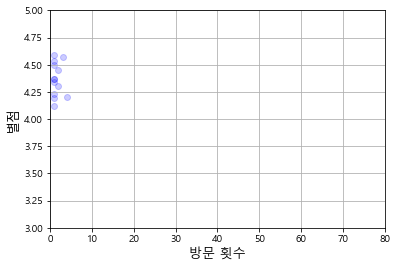

In [271]:
plt.xlim([0,80])
plt.ylim([3.0,5.0])
plt.scatter(df_sorted_by_values['방문 횟수'], df_sorted_by_values['별점'], color='blue', alpha=0.2)
plt.xlabel('방문 횟수', fontsize=13)
plt.ylabel('별점', fontsize=13)
plt.grid()
plt.show()